In [36]:
import sqlite3
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook

In [38]:
# Connect to database
connect = sqlite3.connect("./data/sanoyfresco.db")

# See some datas --> 1
query_table = pd.read_sql_query("""
    SELECT * FROM tickets LIMIT 20
""", connect)

print(query_table)


    id_pedido  id_cliente                fecha  hora  id_departamento  \
0           1      112108  2023-02-02 00:00:00    10                4   
1           1      112108  2023-02-02 00:00:00    10                4   
2           1      112108  2023-02-02 00:00:00    10                4   
3           2      202279  2023-02-03 00:00:00     9                4   
4           2      202279  2023-02-03 00:00:00     9                4   
5           3      205970  2023-06-12 00:00:00    17                4   
6           5      156122  2023-10-21 00:00:00    16                4   
7           5      156122  2023-10-21 00:00:00    16                4   
8           5      156122  2023-10-21 00:00:00    16                4   
9          10      135442  2023-01-28 00:00:00     8                4   
10         10      135442  2023-01-28 00:00:00     8                4   
11         10      135442  2023-01-28 00:00:00     8                4   
12         10      135442  2023-01-28 00:00:00     

In [9]:
total_sales = pd.read_sql_query("""
    SELECT SUM(precio_total) AS ingreso_total FROM tickets
""", connect)

print(f"Ingreso total generado por el negocio: {total_sales['ingreso_total'][0]:,.2f}")

Ingreso total generado por el negocio: 39,854,875.32


In [10]:
# Monthly income trend --> 2
trend_sales = pd.read_sql_query("""
    SELECT strftime('%Y-%m', fecha) AS mes, SUM(precio_total) AS ingresos_mensuales
    FROM tickets
    GROUP BY mes
    ORDER BY mes
""", connect)

print("Monthly income trend")
print(trend_sales)

Monthly income trend
        mes  ingresos_mensuales
0   2023-01          6673099.74
1   2023-02          4945202.53
2   2023-03          4725676.75
3   2023-04          3994824.12
4   2023-05          3626726.78
5   2023-06          3125001.00
6   2023-07          2937364.05
7   2023-08          2533350.46
8   2023-09          2343858.92
9   2023-10          2127269.84
10  2023-11          1637899.98
11  2023-12          1184601.15


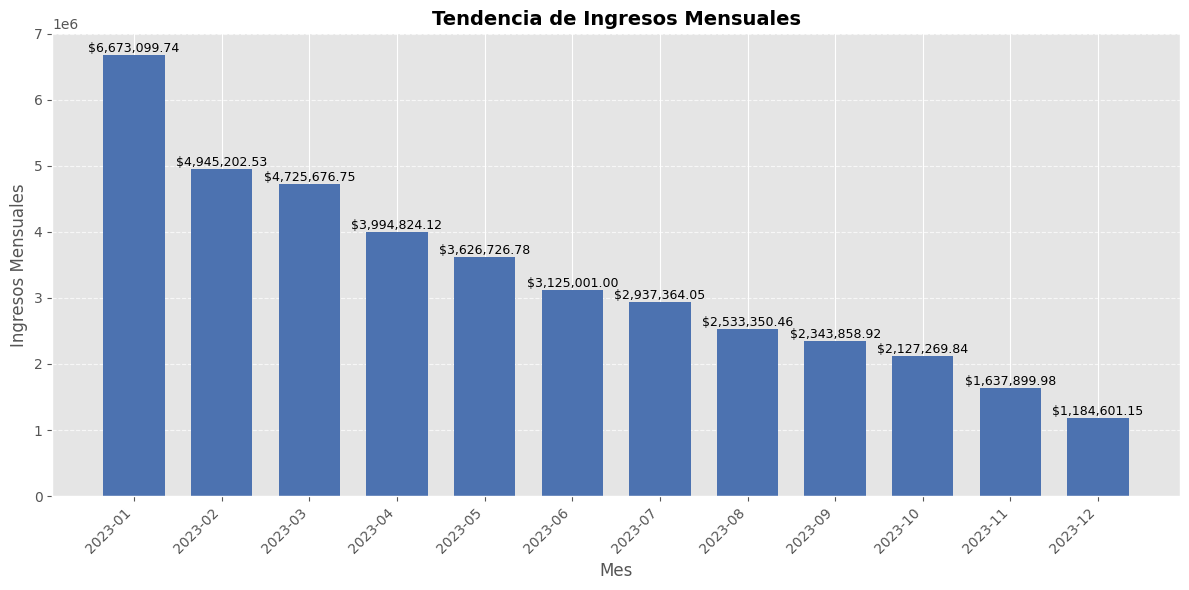

In [25]:
# Create the figure and the axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar chart
bars = ax.bar(trend_sales['mes'], trend_sales['ingresos_mensuales'], width=0.7)

# Add tags and title
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Ingresos Mensuales', fontsize=12)
ax.set_title('Tendencia de Ingresos Mensuales', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better viewing
plt.xticks(rotation=45, ha='right')

# Add the values ​​above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'${height:,.2f}', ha='center', va='bottom', fontsize=9)

# Adjust the layout
plt.tight_layout()

# Add grid for easier reading
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the graph
plt.show()


In [20]:
# Sales by department --> 3
departments = pd.read_sql_query("""
    SELECT 
    id_departamento, 
    SUM(precio_total) AS total_ventas
FROM 
    tickets
GROUP BY 
    id_departamento
ORDER BY 
    total_ventas DESC;
""", connect)
print(departments)

   id_departamento  total_ventas
0                4   37003251.70
1               16    1529354.77
2               20     946220.85
3                7     376048.00


KeyError: 'id_departamento'

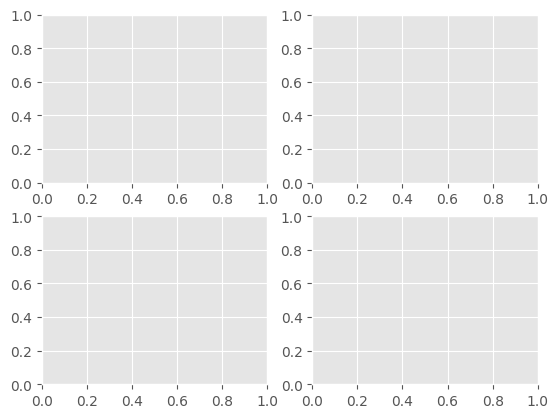

In [27]:
# Create graph
fig, axs = plt.subplots(2, 2)

# Create the bar chart
bars = ax.bar(trend_sales['id_departamento'], trend_sales['total_ventas'], width=0.7)

In [9]:
# Sales distribution --> 4
distribution = pd.read_sql_query("""
    SELECT 
        id_seccion, 
        SUM(precio_total) AS distribucion
    FROM 
        tickets
    GROUP BY 
        id_seccion
    ORDER BY 
        distribucion DESC;
""", connect)

print(distribution)

   id_seccion  distribucion
0          24   20879374.69
1         123    8634823.85
2          83    7237312.87
3          67     946220.85
4          53     821420.62
5          84     707934.15
6         115     376048.00
7          16     251740.29


In [11]:
# Sales per producto (limit 10) --> 5
product_sales = pd.read_sql_query("""
    SELECT 
        nombre_producto, 
        SUM(cantidad) AS total_vendido
    FROM 
        tickets
    GROUP BY 
        nombre_producto
    ORDER BY 
        total_vendido DESC
    LIMIT 10;
""", connect)

print(product_sales)

              nombre_producto  total_vendido
0                      Banana        2460324
1  Bolsa de Bananas Orgánicas        1976709
2            Fresas Orgánicas        1381309
3    Espinacas Baby Orgánicas        1258330
4      Aguacate Hass Orgánico        1104957
5           Aguacate Orgánico         923461
6                Limón Grande         804752
7                      Fresas         748065
8                     Limones         733736
9       Leche Entera Orgánica         715085


In [12]:
# Products revenue --> 6
product_revenue = pd.read_sql_query("""
    SELECT 
        nombre_producto, 
        SUM(precio_total) AS total_vendido
    FROM 
        tickets
    GROUP BY 
        nombre_producto
    ORDER BY 
        total_vendido DESC
    LIMIT 10;
""", connect)

print(product_revenue)

              nombre_producto  total_vendido
0  Bolsa de Bananas Orgánicas     4842937.05
1            Fresas Orgánicas     3439459.41
2                      Banana     2583340.20
3        Frambuesas Orgánicas     2032919.25
4      Aguacate Hass Orgánico     1977873.03
5    Espinacas Baby Orgánicas     1874911.70
6           Aguacate Orgánico     1616056.75
7                      Fresas     1533533.25
8         Arándanos Orgánicos     1444778.50
9    Tomates Cherry Orgánicos     1128040.95


In [13]:
# Customers (limit 20) --> 7
customer = pd.read_sql_query("""
    SELECT 
        id_cliente, 
        SUM(precio_total) AS total_compras
    FROM 
        tickets
    GROUP BY 
        id_cliente
    ORDER BY 
        total_compras DESC
    LIMIT 20;
""", connect)

print(customer)

    id_cliente  total_compras
0       189425        4784.44
1       145686        4656.01
2        95967        4441.07
3        67870        4381.49
4        51256        4280.17
5       108031        4170.37
6       105213        4164.07
7        66806        4010.08
8       153932        3966.09
9       143296        3887.86
10      175294        3886.68
11        1197        3883.76
12       62239        3873.40
13        5665        3862.69
14       31552        3852.53
15      132274        3842.65
16       14868        3836.05
17      103634        3808.71
18      132022        3803.13
19       94701        3783.81


In [14]:
# Average purchase per customer --> 8
average_purchase = pd.read_sql_query("""
    SELECT SUM(precio_total)
    / COUNT (DISTINCT id_cliente) AS compra_media
    FROM tickets
""", connect)

print(average_purchase)

   compra_media
0    219.099604


In [15]:
# Total orders --> 9
total_orders = pd.read_sql_query("""
    SELECT COUNT(DISTINCT id_pedido) AS total_pedidos
    FROM tickets
""", connect)

print(total_orders)

   total_pedidos
0        2060188


In [16]:
# average value per order
average_order = pd.read_sql_query("""
    SELECT AVG(precio_total_pedido) AS promedio_valor
    FROM (
        SELECT id_pedido, SUM(precio_total) AS precio_total_pedido
        FROM tickets
        GROUP BY id_pedido
    )
""", connect)

print(average_order)

   promedio_valor
0       19.345261


In [ ]:
# trend_sales.to_excel('ventas_cliente.xlsx', sheet_name='clientes', index=False)

In [17]:
# Close connect
connect.close()